# Assignment 05

Joel Brigida

CAP4613-001 Intro to Deep Learning

Prof. Behnaz Ghoraani

Due Date: April 03, 2023

#### Import Libraries:

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Turn Off Messages

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img
from random import randint
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical # Convert Class Vectors to Binary Class Matrices

#### Functions To Plot Images:

In [2]:
def dispAnImage(filepath):
    myImage = img.imread(filepath)
    plt.figure(figsize = (15, 15))
    plt.imshow(myImage)
    plt.show()

def img_plt(img, label):
    plt.figure(figsize=(12, 5.5))
    for i in range (1, 11):
        plt.subplot(2, 5, i)
        plt.imshow(img[i - 1, :, :], cmap = 'gray')
        plt.title('Label: ' + str(label[i - 1]))
    plt.show()

# Plot Features of MNIST data
def feat_plot(features, labels, classes, title):
    for class_i in classes:
        plt.plot(features[labels[:] == classes[class_i], 0],
                 features[labels[:] == classes[class_i], 1], 'o', markersize = 5)
        # plt.axis([-2, 2, -2, 2])
        plt.xlabel('X: Feature 1')
        plt.ylabel('Y: Feature 2')
        plt.title(title)
        plt.legend(['Class ' + str(classes[class_i]) for class_i in classes])
    plt.show()

# plot training accuracy and loss
def plotCurve(trainingAccuracy, trainingLoss, supTitle):
    epochs = np.arange(trainingLoss.shape[0])
    #print(epochs)
    plt.figure(figsize = [13, 7])
    plt.suptitle(supTitle)
    plt.tight_layout()
    plt.subplot(1, 2, 1)
    plt.plot(epochs, trainingAccuracy)
    #plt.axis([-1, 2, -1, 2])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, trainingLoss)
    plt.xlabel('Epoch')
    plt.ylabel('Binary CrossEntropy Loss')
    plt.title('Training Loss')
    plt.show()


#### Function For Feature Extraction From MNIST Images:

In [3]:
def feat_extract_mult(images):
    width = images.shape[1]
    height = images.shape[2]
    features = np.zeros((images.shape[0], 4))

    features_temp = np.sum(images[:, 0:int(width / 2), 0:int(height / 2)], axis = 2) # Quadrant 0
    features[:,0] = np.sum(features_temp, axis = 1) / (width * height / 4) # Average Pixel Values
    
    features_temp = np.sum(images[:, 0:int(width / 2), int(height / 2):], axis = 2) # Quadrant 1
    features[:,1] = np.sum(features_temp, axis = 1) / (width * height / 4) # Average Pixel Values
    
    features_temp = np.sum(images[:, int(width / 2):, 0:int(height / 2)], axis = 2) # Quadrant 2
    features[:,2] = np.sum(features_temp, axis = 1) / (width * height / 4) # Average Pixel Values
    
    features_temp = np.sum(images[:, int(images.shape[1] / 2):, int(images.shape[2] / 2):], axis = 2) # Quadrant 3
    features[:,3] = np.sum(features_temp, axis = 1) / (width * height / 4) # Average Pixel Values
    return features

## Problem 1: Forward-backward propagation: Consider the following forward feed neural network:

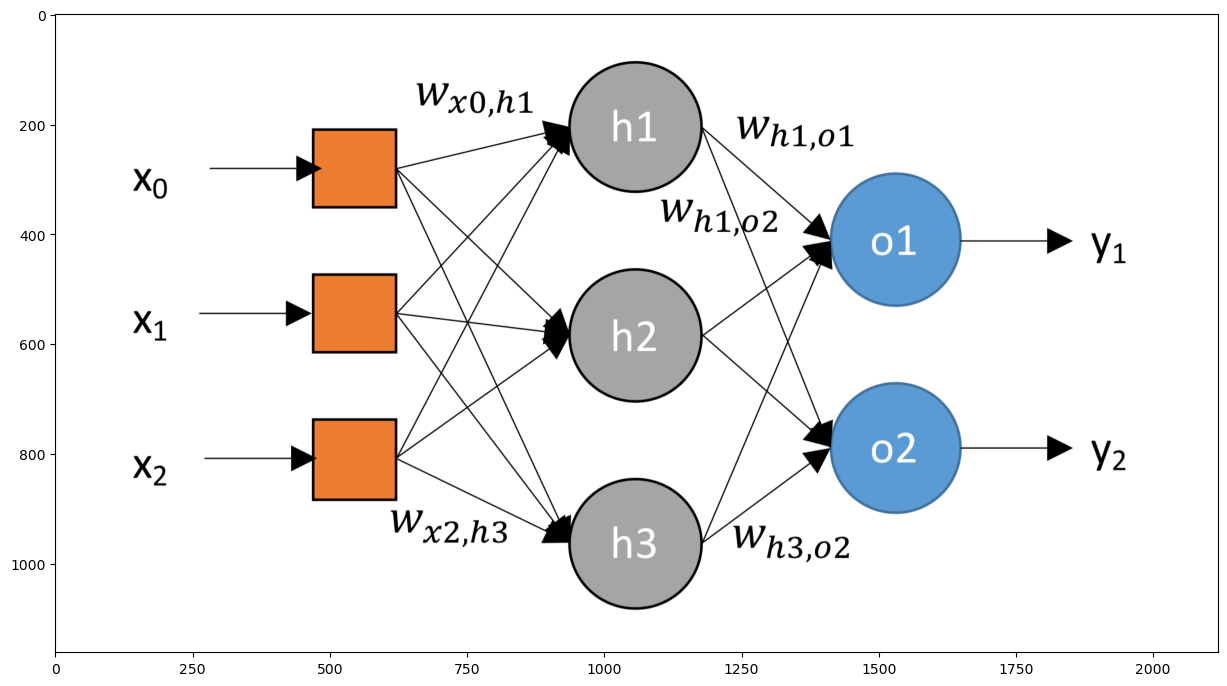

In [4]:
dispAnImage('../assets/HW5/HW5-1.png')

#### Initial weights are given below:
#### Learn rate $ \eta = 0.5 $. The activation function is a sigmoid function with $ \alpha = 1 $ for all the neurons.

#### $$ \varphi(x) = \frac{1}{1 + \alpha e^{-x}} $$

#### $$ w_{x_0, h_1} = 0.18, \ w_{x_1, h_1} = 0.32, \ w_{x_2, h_1} = 0.42 $$
#### $$ w_{x_0, h_2} = 0.51, \ w_{x_1, h_2} = 0.64, \ w_{x_2, h_2} = 0.12 $$
#### $$ w_{x_0, h_3} = 0.43, \ w_{x_1, h_3} = 0.72, \ w_{x_2, h_3} = 0.33 $$
#### $$ w_{h_0, O_1} = 0.53, \ w_{h_1, O_1} = 0.22, \ w_{h_2, O_1} = 0.19, \ w_{h_2, O_1} = 0.61 $$
#### $$ w_{h_0, O_2} = 0.61, \ w_{h_1, O_2} = 0.38, \ w_{h_2, O_2} = 0.21, \ w_{h_3, O_2} = 0.15 $$

#### For training, the inputs of the features $ (x_1 = 1, \ x_2 = 0) $  and the label of class $ y_1 $ , perform the forward-backward steps as instructed below.

#### HINT: The data sample belongs to class $ y_1 $. This means that for this data sample, $ y_1 = 1 $ and $ y_2 = 0 $.

 - a) Perform the forward propagation from the left to the right side of the network. Show the detailed calculations in each step. Report the computed outputs in the table below:

<div align="center">

| $ y_{h_1} $ | $ y_{h_2} $ | $ y_{h_3} $ | $ y_{1} $ | $ y_{2} $ |
| :-: | :-: | :-: | :-: | :-: |
| $ 0.6225 $ | $ 0.7595 $ | $ 0.7595 $ | $ 0.7815 $ | $ 0.7540 $ |

</div>


Calculations For Problem #1a:



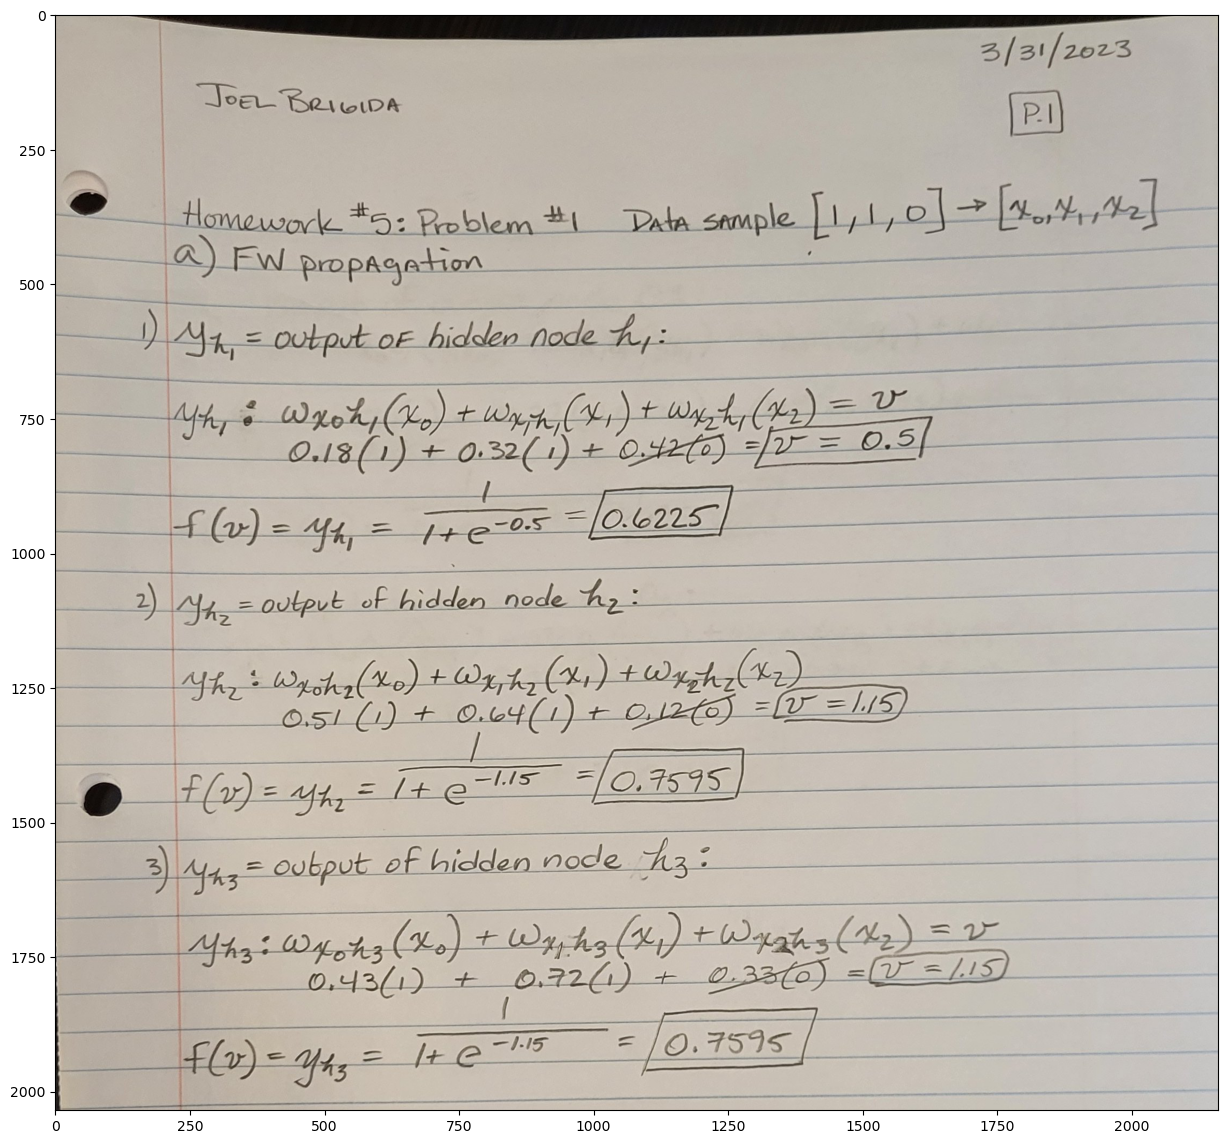

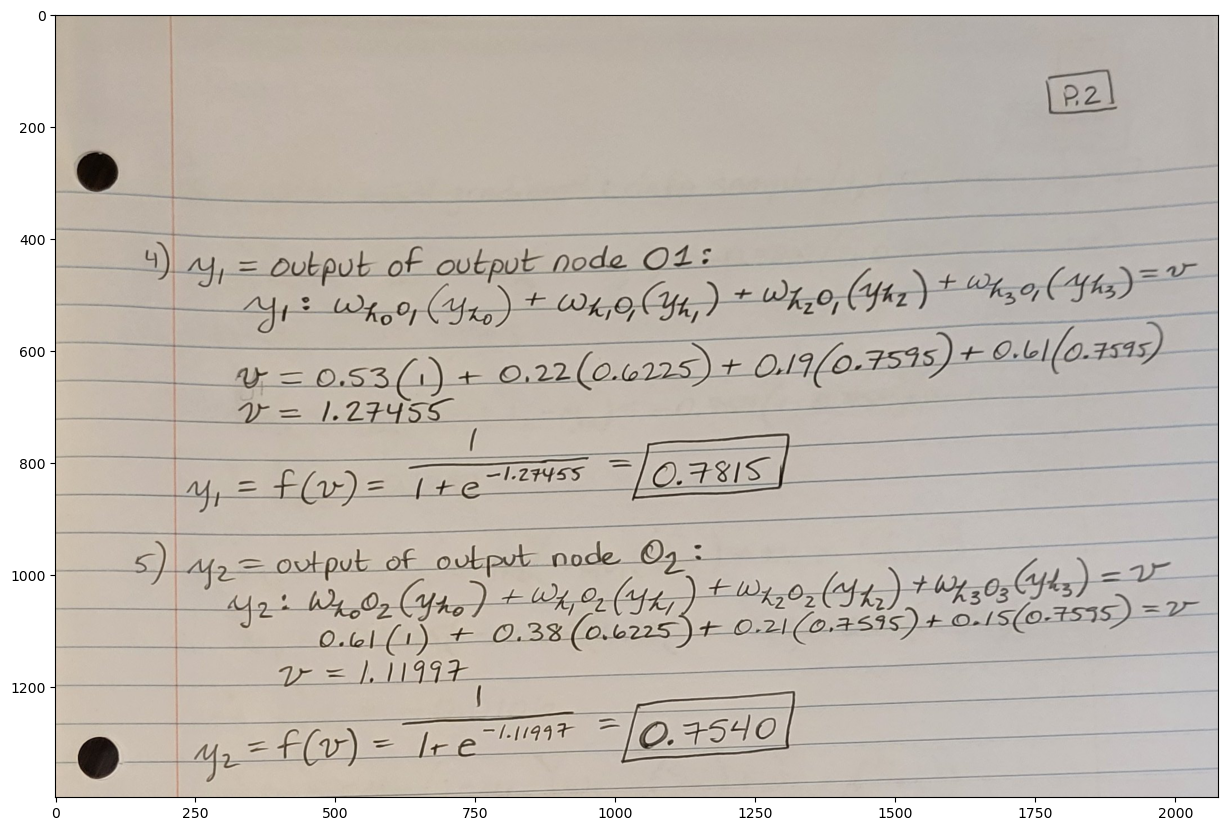

In [5]:
print('\nCalculations For Problem #1a:\n')
dispAnImage('../assets/HW5/HW5-1a1.jpg')
dispAnImage('../assets/HW5/HW5-1a2.jpg')

- b) Compute the local gradients of each node from the right to the left side of the network. Show the detailed calculations in each step. Report the computed local gradients in the table below:

<div align="center">

| $ \delta_{h_1} $ | $ \delta_{h_2} $ | $ \delta_{h_3} $ | $ \delta_{O_1} $ | $ \delta_{O_2} $ |
| :-: | :-: | :-: | :-: | :-: |
| $ -0.0106 $ | $ -0.0041 $ | $ 0.00032 $ | $ -0.0373 $ | $ 0.1399 $ |

</div>


Calculations For Problem #1b:



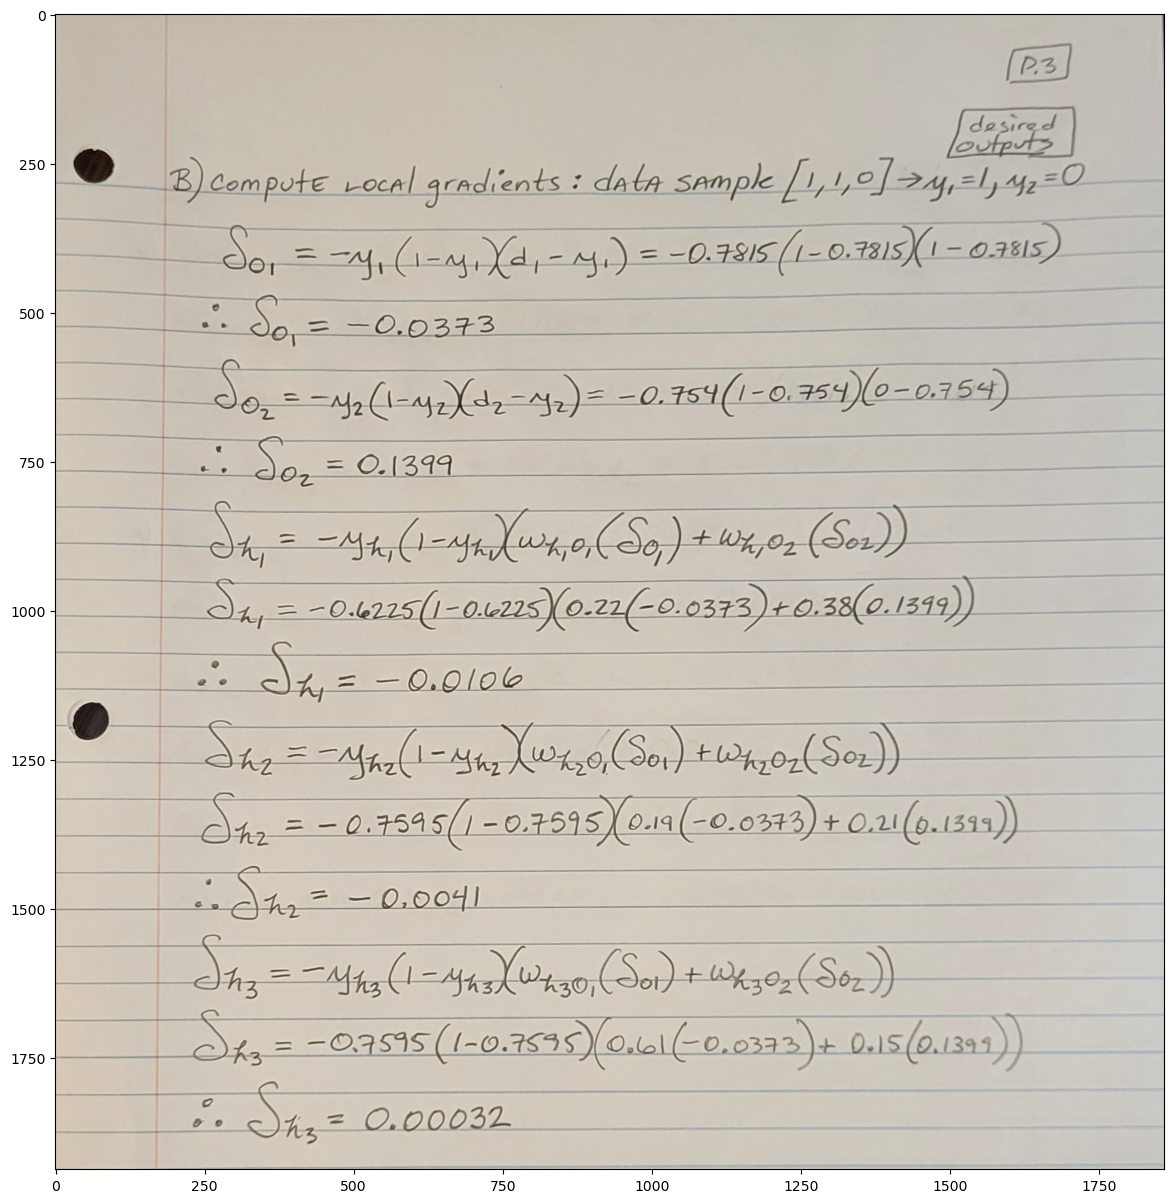

In [6]:
print('\nCalculations For Problem #1b:\n')
dispAnImage('../assets/HW5/HW5-1b.jpg')

 - c) Only for the bias weights of each neuron: compute the change in the weight and the updated weight. Show the detailed calculations in each step. Report the computed values in the table below:

<div align="center">

| $ \Delta w_{x_0, h_1} $ | $ \Delta w_{x_0, h_2} $ | $ \Delta w_{x_0, h_3} $ | $ \Delta w_{h_0, O_1} $ | $ \Delta w_{h_0, O_2} $ |
| :-: | :-: | :-: | :-: | :-: |
| $ 0.0053 $ | $ 0.00205 $ | $ -0.00016 $ | $ 0.01865 $ | $ -0.06995 $ |

</div>
<br><br>
<div align="center">

|  $ w_{x_0, h_1} $ | $ w_{x_0, h_2} $ | $ w_{x_0, h_3} $ | $ w_{h_0, O_1} $ | $ w_{h_0, O_2} $ |
| :-: | :-: | :-: | :-: | :-: |
| $ 0.1853 $ | $ 0.51205 $ | $ 0.42984 $ | $ 0.54865 $ | $ 0.54005 $ |

</div>


Calculations For Problem #1c:



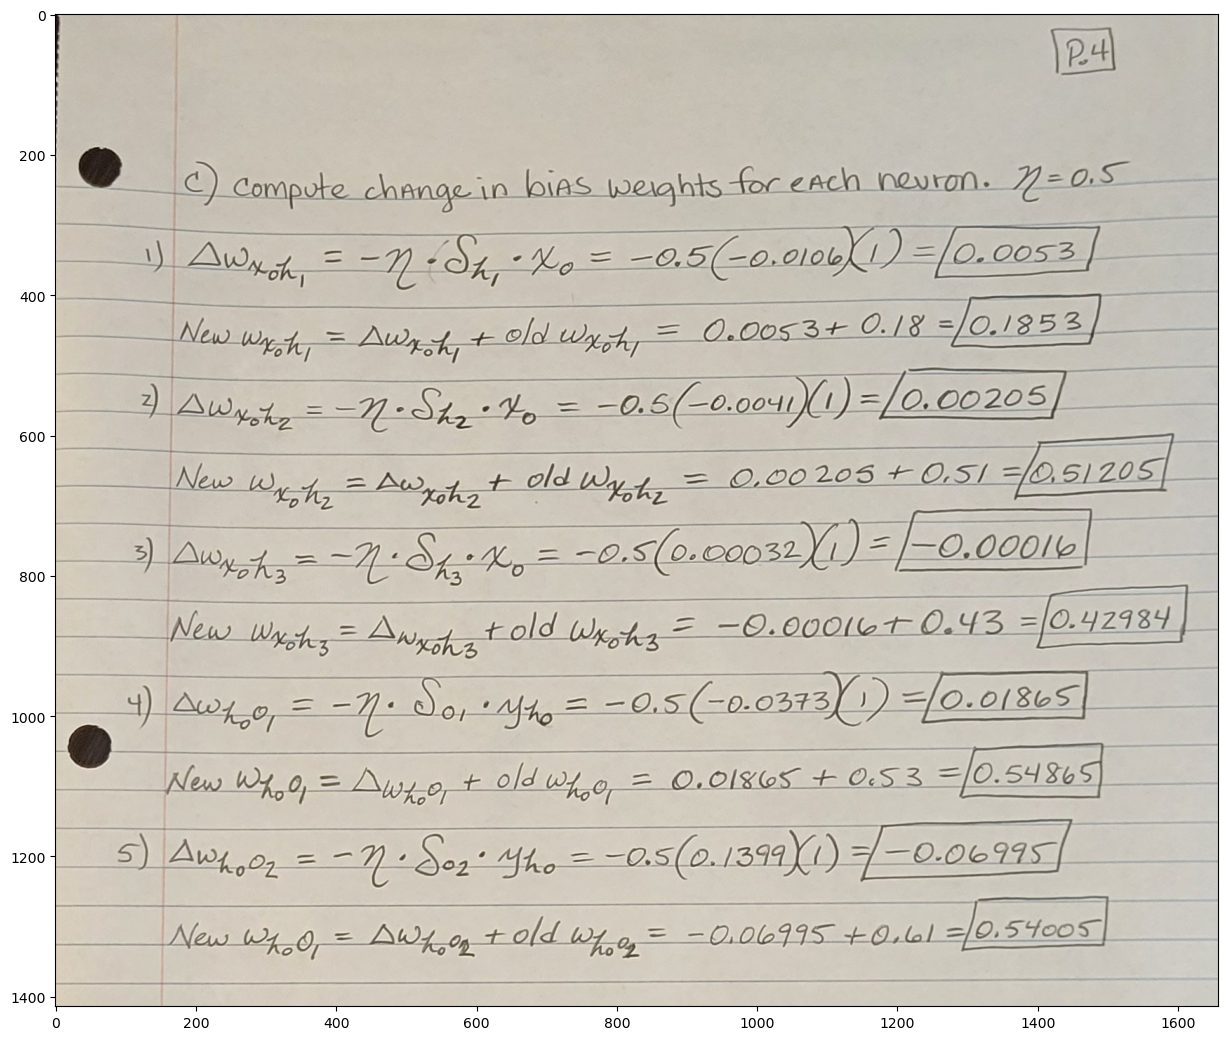

In [7]:
print('\nCalculations For Problem #1c:\n')
dispAnImage('../assets/HW5/HW5-1c.jpg')

## Problem 2) Application of Keras to build, compile, and train a neural network as a three-class classifier for MNIST dataset (0 vs. 1 vs. 2):

 - a) Use mnist function in `keras.datasets` to load MNIST dataset and split it into training and testing sets. Then, randomly select 20% of the training images along with their corresponding labels to be the validation data.
 - b) Feature extraction: average the pixel values in the quadrants in each image to generate a feature vector of 4 values for each image.
 - c) Convert the label vectors for all the sets to binary class matrices using `to_categorical()` Keras function.
 - d) Build, compile, train, and then evaluate:
    - i. Build a neural network with 1 layer that contains 16 nodes using the Keras library.
    - ii. Compile the network. Make sure to select a correct loss function for this classification problem. Use stochastic gradient descent learning (SGD, learning rate of 0.0001). Explain your selection of the loss function.
    - iii. Train the network for 30 epochs and a batch size of 16.
    - iv. Plot the training loss (i.e., the learning curve) for all the epochs.
    - v. Use the evaluate() Keras function to find the training and validation loss and accuracy.
 - e) Repeat step (d) for each of the following networks:

<div align="center">

| Model # | Details |
| :-: | :-: |
| $ 1 $ | 1 Layer<br>16 Nodes |
| $ 2 $ | 1 Layer<br>64 Nodes |
| $ 3 $ | 1 Layer<br>128 Nodes |
| $ 4 $ | 2 Layers<br>128 Nodes<br>16 nodes |
| $ 5 $ | 2 Layers<br>128 Nodes<br>64 nodes |

</div>

 - f) What behavior do you observe in the training loss and the validation loss when you increase the number layers and nodes in the previous table. Which model is more suitable in this problem? Explain.
 - g) Evaluate the selected model in part (e) on the testing set and report the testing loss and accuracy.

#### Load MNIST Dataset & Split Into Training & Testing Sets:

In [8]:
# Load Data and Split to Training and Testing Sets:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#print(x_train.shape) # (60000, 28, 28)
#print(y_train.shape) # (60000,)
#print(x_test.shape) # (10000, 28, 28)
#print(y_test.shape) # (10000,)

print('The number of Training Images =', x_train.shape[0])
print('The number of Training Labels =', y_train.shape[0])
print('The size of each Training Image is:', x_train.shape[1], 'by', x_train.shape[2], 'pixels \n')
print('The number of Testing Images =', x_test.shape[0])
print('The number of Testing Labels =', y_test.shape[0])
print('The size of each Testing Image is:', x_test.shape[1], 'by', x_test.shape[2], 'pixels')

The number of Training Images = 60000
The number of Training Labels = 60000
The size of each Training Image is: 28 by 28 pixels 

The number of Testing Images = 10000
The number of Testing Labels = 10000
The size of each Testing Image is: 28 by 28 pixels


#### Plot Digits 0 - 9 From The Training Set:

 - For Each Digit, Select A Random Sample.

10 Random Images from 0 - 9: 



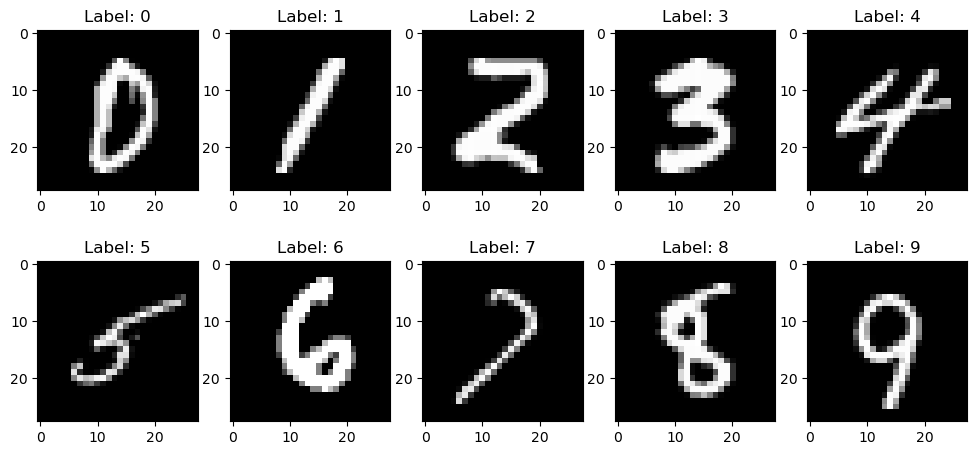

In [9]:
# Select 10 images from the training set
x_train_rnd = np.zeros((10, 28, 28))
y_train_rnd = np.arange(10)

for digit in range(10): # finds 10 images from the set
    x_train_d = x_train[y_train == digit,:,:]
    #x_train_rnd[digit,:,:] = x_train_d[0,:,:] # Select FIRST Digits From Set
    x_train_rnd[digit,:,:] = x_train_d[randint(0, x_train_d.shape[0]),:,:] # Select RANDOM Digits From Set

print(f'10 Random Images from 0 - 9: \n')
img_plt(x_train_rnd, y_train_rnd) # plot the images

### Select MNIST Digits 0, 1 and 2:
 
 - Select All 0's, 1's & 2's From Training & Testing Sets.
 - Create an array of the images.
 - Create a 2nd array of labels for the images.

In [10]:
# Create a boolean mask to select images of digits 0, 1, and 2
train_mask_012 = np.isin(y_train, [0, 1, 2])

# Use boolean indexing to select the corresponding images and labels
x_train_012 = x_train[train_mask_012]
y_train_012 = y_train[train_mask_012]

#print(x_train_012.shape) # debug
#print(y_train_012.shape) # debug
print(f'Total Number of 0\'s, 1\'s & 2\'s in \'x_train_012\' is: {x_train_012.shape[0]}\n')

test_mask_012 = np.isin(y_test, [0, 1, 2])

# Use boolean indexing to select the corresponding images and labels
x_test_012 = x_test[test_mask_012]
y_test_012 = y_test[test_mask_012]

#print(x_test_012.shape) # debug
#print(y_test_012.shape) # debug
print(f'Total Number of 0\'s, 1\'s & 2\'s in \'x_test_012\' is: {x_test_012.shape[0]}\n')

Total Number of 0's, 1's & 2's in 'x_train_012' is: 18623

Total Number of 0's, 1's & 2's in 'x_test_012' is: 3147



#### Select 20% Of The Training Images For Validation & Randomize Everything:

In [11]:
num_train_img = x_train_012.shape[0]

# New Array For Randomizing the Training and Validation Sets
train_ind = np.arange(0, num_train_img)
print(f'Ordered Training Indices: {train_ind}')
train_ind_rnd = np.random.permutation(train_ind)
print(f'Randomized Training Indices: {train_ind_rnd}\n')

# Extract 20% of training data as Validation Data & randomize
x_valid_012_rnd = x_train_012[train_ind_rnd[0:int(0.2 * num_train_img)],:,:]
y_valid_012_rnd = y_train_012[train_ind_rnd[0:int(0.2 * num_train_img)]]

# Randomize the remaining 80% of the data for Training
x_train_012_rnd = x_train_012[train_ind_rnd[int(0.2 * num_train_img):],:,:]
y_train_012_rnd = y_train_012[train_ind_rnd[int(0.2 * num_train_img):]]
print(f'Number of Training Images Before Validation = {x_train_012.shape[0]}')
print(f'Number of Training Images After Validation = {x_train_012_rnd.shape[0]}')
print(f'Number of Validation Images = {x_valid_012_rnd.shape[0]}\n')

num_test_img = x_test_012.shape[0]
print(f'Number of Testing Images Before Randomization = {num_test_img}')

# New Array For Randomizing the Testing Set
test_ind = np.arange(0, num_test_img)
print(f'Ordered Test Indices: {test_ind}')
test_ind_rnd = np.random.permutation(test_ind)
print(f'Randomized Test Indices: {test_ind_rnd}\n')

x_test_012_rnd = x_test_012[test_ind_rnd[:],:,:]
y_test_012_rnd = y_test_012[test_ind_rnd[:]]

# Test that the original training set = new training set + validation set:
if(x_valid_012_rnd.shape[0] + x_train_012_rnd.shape[0] == num_train_img):
    print('Success!!\n')
else:
    print('FAIL!!\n')

# Check that Test set and randomized test set have the same size:
if(x_test_012_rnd.shape[0] == x_test_012.shape[0]):
    print('Success!!\n')
else:
    print('FAIL!!\n')

Ordered Training Indices: [    0     1     2 ... 18620 18621 18622]
Randomized Training Indices: [15003 16918  1591 ... 12033  4849  2212]

Number of Training Images Before Validation = 18623
Number of Training Images After Validation = 14899
Number of Validation Images = 3724

Number of Testing Images Before Randomization = 3147
Ordered Test Indices: [   0    1    2 ... 3144 3145 3146]
Randomized Test Indices: [2126 1978 2195 ...  232 2198    6]

Success!!

Success!!



#### Plot Random Images From Randomized Testing, Training & Validation Sets:


1st 10 Randomized Images From Training Set:



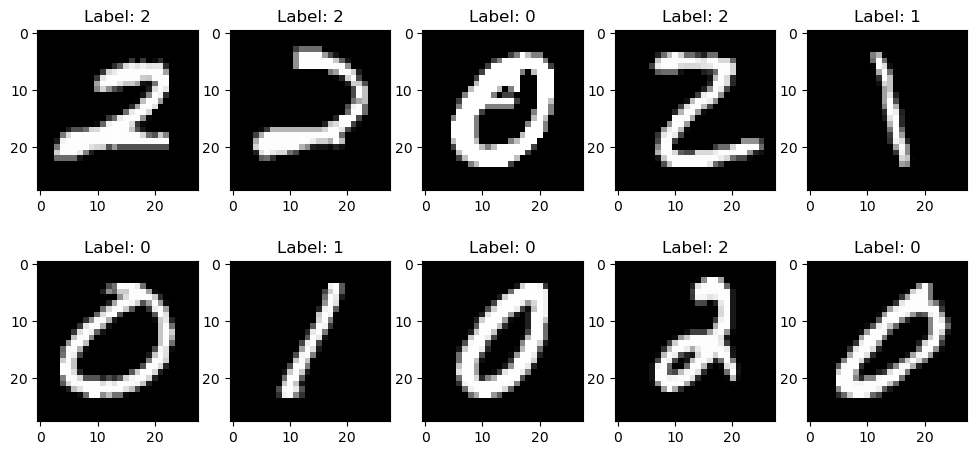


1st 10 Randomized Images From Testing Set:



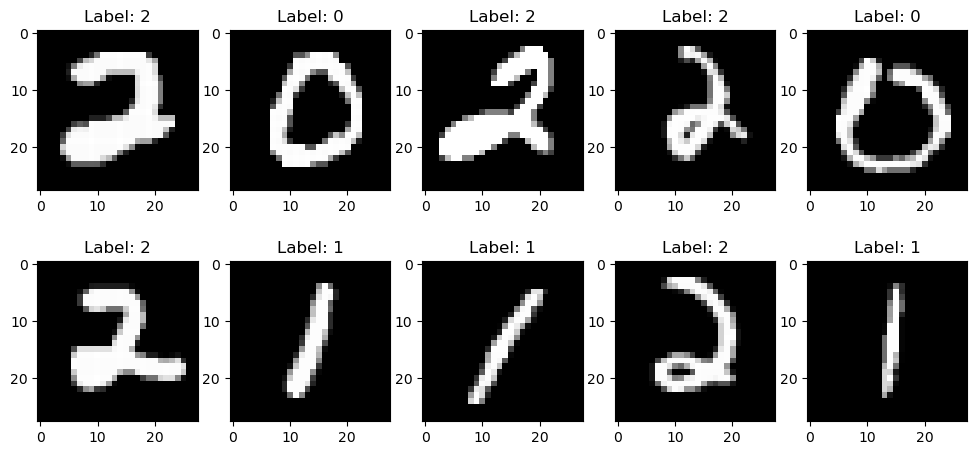


1st 10 Randomized Images From Validation Set:



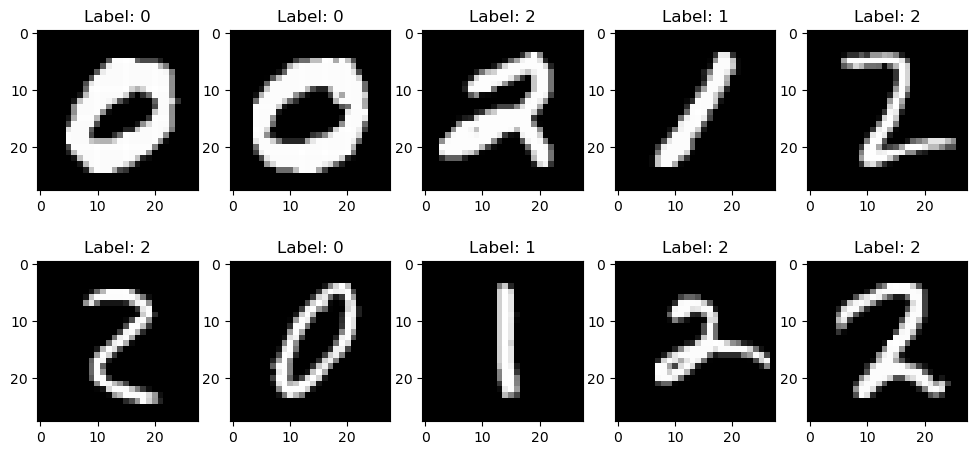

In [12]:
print('\n1st 10 Randomized Images From Training Set:\n')
img_plt(x_train_012_rnd[0:10], y_train_012_rnd[0:10])

print('\n1st 10 Randomized Images From Testing Set:\n')
img_plt(x_test_012_rnd[0:10], y_test_012_rnd[0:10])

print('\n1st 10 Randomized Images From Validation Set:\n')
img_plt(x_valid_012_rnd[0:10], y_valid_012_rnd[0:10])

#### Feature Extraction & Average Pixel Values For Each of 4 Quadrants:

 - Plot Extracted Features As A Debug

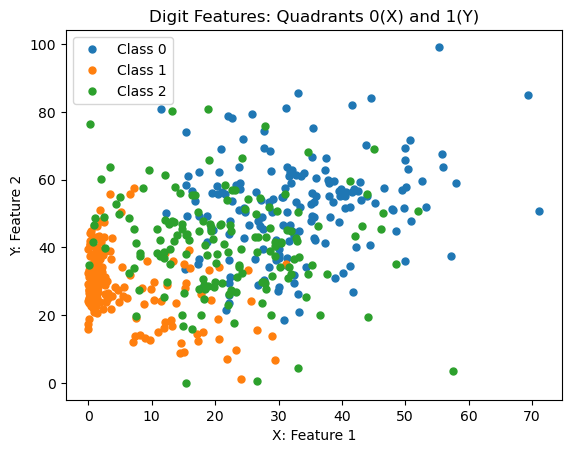

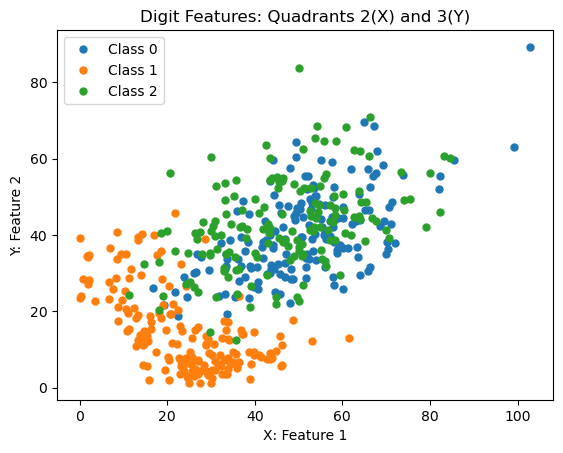

In [13]:
classes = [0, 1, 2]
feature_train_012 = feat_extract_mult(x_train_012_rnd)
feature_valid_012 = feat_extract_mult(x_valid_012_rnd)
feature_test_012 = feat_extract_mult(x_test_012_rnd)

feat_plot(feature_train_012[0:500, 0:2], y_train_012_rnd[0:500], classes, 'Digit Features: Quadrants 0(X) and 1(Y)')
feat_plot(feature_train_012[0:500, 2:4], y_train_012_rnd[0:500], classes, 'Digit Features: Quadrants 2(X) and 3(Y)')

#### Convert Label Vectors To Binary Class Matrices:

In [14]:
y_train_012_cat = to_categorical(y_train_012_rnd, len(classes))
y_valid_012_cat = to_categorical(y_valid_012_rnd, len(classes))
y_test_012_cat = to_categorical(y_test_012_rnd, len(classes))

#### Model 1: 1 Layer, 16 Nodes

##### Build The Model:

In [15]:
model1 = Sequential()
model1.add(Dense(input_dim = 4, units = 16, activation = 'tanh')) # 4 Input Dimensions: 4 quadrants
model1.add(Dense(units = len(classes), activation = 'softmax')) # Output Layer
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


##### Compile, Train & Fit The Network:

Use Stochastic Gradient Descent (SGD) with Learning Rate $ \eta = 0.0001 $

In [16]:
opt1 = tf.keras.optimizers.SGD(learning_rate = 0.0001) # Stochastic Gradient Descent
model1.compile(loss='categorical_crossentropy', optimizer=opt1, metrics=['accuracy'])

history = model1.fit(feature_train_012, y_train_012_cat, batch_size=16, epochs=30, verbose=1)

Epoch 1/30
932/932 [==============================] - 3s 3ms/step - loss: 1.1056 - accuracy: 0.3643
Epoch 2/30
932/932 [==============================] - 2s 2ms/step - loss: 0.9618 - accuracy: 0.5372
Epoch 3/30
932/932 [==============================] - 3s 3ms/step - loss: 0.8966 - accuracy: 0.6008
Epoch 4/30
932/932 [==============================] - 3s 4ms/step - loss: 0.8501 - accuracy: 0.6747
Epoch 5/30
932/932 [==============================] - 3s 3ms/step - loss: 0.8161 - accuracy: 0.7329
Epoch 6/30
932/932 [==============================] - 4s 4ms/step - loss: 0.7915 - accuracy: 0.7535
Epoch 7/30
932/932 [==============================] - 3s 3ms/step - loss: 0.7721 - accuracy: 0.7600
Epoch 8/30
932/932 [==============================] - 3s 4ms/step - loss: 0.7550 - accuracy: 0.7670
Epoch 9/30
932/932 [==============================] - 4s 4ms/step - loss: 0.7391 - accuracy: 0.7727
Epoch 10/30
932/932 [==============================] - 4s 4ms/step - loss: 0.7243 - accuracy: 0.7759

##### Evaluate The Model:

466/466 [==============================] - 1s 2ms/step - loss: 0.5547 - accuracy: 0.8322

Total Loss From Training Set:  0.5547147393226624
Accuracy of Training Set: 83.22035074234009 %

117/117 [==============================] - 0s 2ms/step - loss: 0.5636 - accuracy: 0.8306

Total Loss From Validation Set:  0.5635673403739929
Accuracy of Validation Set: 83.05585384368896 %



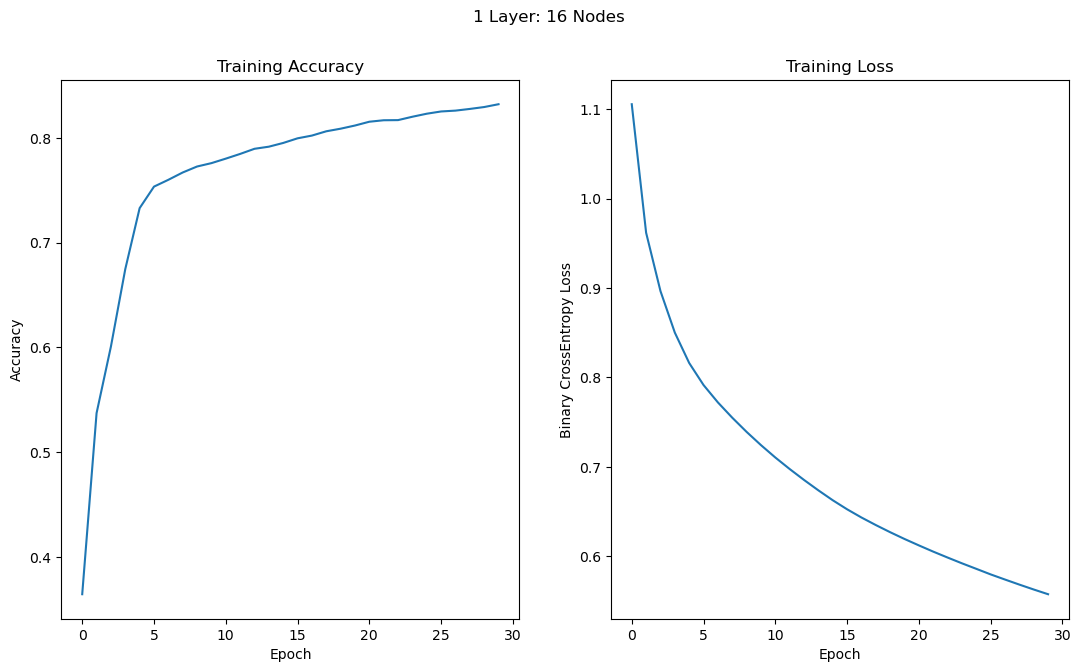

In [39]:
scoreTrain1 = model1.evaluate(feature_train_012, y_train_012_cat)
print('\nTotal Loss From Training Set: ', scoreTrain1[0])
print(f'Accuracy of Training Set: {scoreTrain1[1] * 100} %\n')

scoreValid1 = model1.evaluate(feature_valid_012, y_valid_012_cat)
print('\nTotal Loss From Validation Set: ', scoreValid1[0])
print(f'Accuracy of Validation Set: {scoreValid1[1] * 100} %\n')

accuracyCurve1 = np.array(history.history['accuracy'])
lossCurve1 = np.array(history.history['loss'])
plotCurve(accuracyCurve1, lossCurve1, '1 Layer: 16 Nodes')

####  Model 2: 1 Layer, 64 Nodes

##### Build The Model:

In [18]:
model2 = Sequential()
model2.add(Dense(input_dim = 4, units = 64, activation = 'tanh')) # 4 Input Dimensions: 4 quadrants
model2.add(Dense(units = len(classes), activation = 'softmax')) # Output Layer
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                320       
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


##### Compile, Train & Fit The Network:

Use Stochastic Gradient Descent (SGD) with Learning Rate $ \eta = 0.0001 $

In [19]:
opt2 = tf.keras.optimizers.SGD(learning_rate = 0.0001) # Stochastic Gradient Descent
model2.compile(loss='categorical_crossentropy', optimizer=opt2, metrics=['accuracy'])

history2 = model2.fit(feature_train_012, y_train_012_cat, batch_size=16, epochs=30, verbose=1)

Epoch 1/30
932/932 [==============================] - 2s 2ms/step - loss: 0.9379 - accuracy: 0.6451
Epoch 2/30
932/932 [==============================] - 2s 2ms/step - loss: 0.7280 - accuracy: 0.7786
Epoch 3/30
932/932 [==============================] - 3s 3ms/step - loss: 0.6524 - accuracy: 0.8012
Epoch 4/30
932/932 [==============================] - 2s 2ms/step - loss: 0.5985 - accuracy: 0.8221
Epoch 5/30
932/932 [==============================] - 2s 3ms/step - loss: 0.5521 - accuracy: 0.8408
Epoch 6/30
932/932 [==============================] - 3s 3ms/step - loss: 0.5147 - accuracy: 0.8546
Epoch 7/30
932/932 [==============================] - 2s 2ms/step - loss: 0.4869 - accuracy: 0.8626
Epoch 8/30
932/932 [==============================] - 3s 3ms/step - loss: 0.4656 - accuracy: 0.8669
Epoch 9/30
932/932 [==============================] - 2s 3ms/step - loss: 0.4480 - accuracy: 0.8718
Epoch 10/30
932/932 [==============================] - 3s 3ms/step - loss: 0.4336 - accuracy: 0.8748

##### Evaluate The Model:

466/466 [==============================] - 1s 2ms/step - loss: 0.3423 - accuracy: 0.8861

Total Loss From Training Set:  0.3422951400279999
Accuracy of Training Set: 88.60997557640076 %

117/117 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.8743

Total Loss From Validation Set:  0.3658541142940521
Accuracy of Validation Set: 87.43286728858948 %



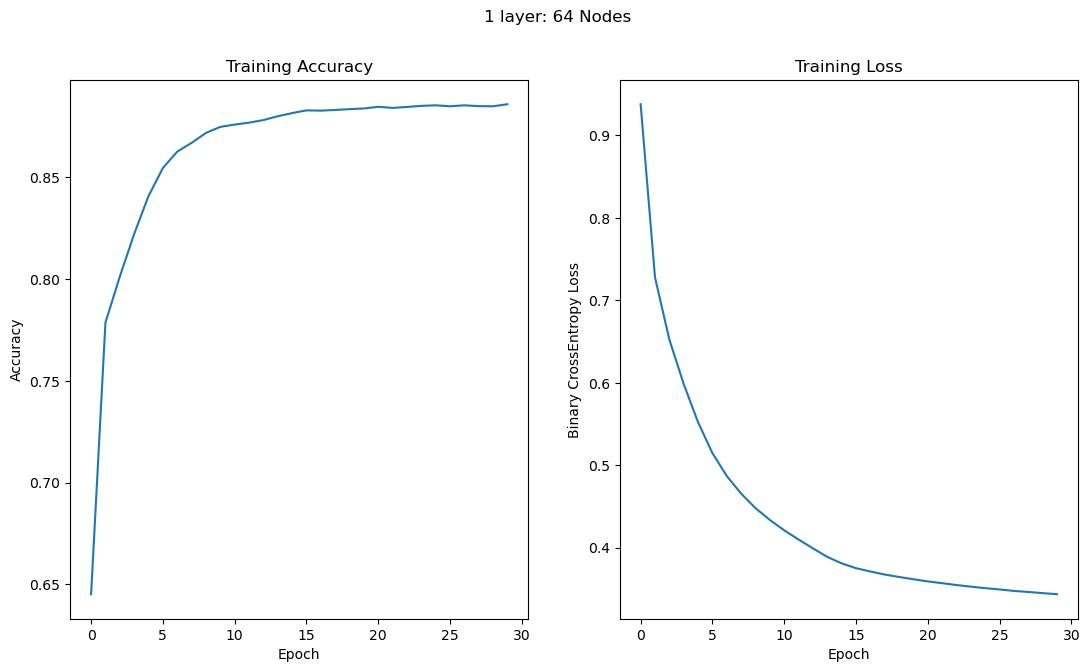

In [40]:
scoreTrain2 = model2.evaluate(feature_train_012, y_train_012_cat)
print('\nTotal Loss From Training Set: ', scoreTrain2[0])
print(f'Accuracy of Training Set: {scoreTrain2[1] * 100} %\n')

scoreValid2 = model2.evaluate(feature_valid_012, y_valid_012_cat)
print('\nTotal Loss From Validation Set: ', scoreValid2[0])
print(f'Accuracy of Validation Set: {scoreValid2[1] * 100} %\n')

accuracyCurve2 = np.array(history2.history['accuracy'])
lossCurve2 = np.array(history2.history['loss'])
plotCurve(accuracyCurve2, lossCurve2, '1 layer: 64 Nodes')

#### Model 3: 1 Layer, 128 Nodes

##### Build The Model:

In [21]:
model3 = Sequential()
model3.add(Dense(input_dim = 4, units = 128, activation = 'tanh')) # 4 Input Dimensions: 4 quadrants
model3.add(Dense(units = len(classes), activation = 'softmax')) # Output Layer
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               640       
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________


##### Compile And Train The Network:

Use Stochastic Gradient Descent (SGD) with Learning Rate $ \eta = 0.0001 $

In [22]:
opt3 = tf.keras.optimizers.SGD(learning_rate = 0.0001) # Stochastic Gradient Descent
model3.compile(loss='categorical_crossentropy', optimizer=opt3, metrics=['accuracy'])

history3 = model3.fit(feature_train_012, y_train_012_cat, batch_size=16, epochs=30, verbose=1)

Epoch 1/30
932/932 [==============================] - 2s 2ms/step - loss: 0.9403 - accuracy: 0.6422
Epoch 2/30
932/932 [==============================] - 3s 3ms/step - loss: 0.6789 - accuracy: 0.8184
Epoch 3/30
932/932 [==============================] - 3s 3ms/step - loss: 0.5717 - accuracy: 0.8598
Epoch 4/30
932/932 [==============================] - 2s 2ms/step - loss: 0.5027 - accuracy: 0.8692
Epoch 5/30
932/932 [==============================] - 3s 3ms/step - loss: 0.4608 - accuracy: 0.8744
Epoch 6/30
932/932 [==============================] - 3s 3ms/step - loss: 0.4345 - accuracy: 0.8783
Epoch 7/30
932/932 [==============================] - 3s 3ms/step - loss: 0.4149 - accuracy: 0.8797
Epoch 8/30
932/932 [==============================] - 3s 4ms/step - loss: 0.3990 - accuracy: 0.8809
Epoch 9/30
932/932 [==============================] - 3s 3ms/step - loss: 0.3859 - accuracy: 0.8827
Epoch 10/30
932/932 [==============================] - 3s 3ms/step - loss: 0.3738 - accuracy: 0.8833

##### Evaluate The Model:

466/466 [==============================] - 2s 4ms/step - loss: 0.3093 - accuracy: 0.8891

Total Loss From Training Set:  0.309349924325943
Accuracy of Training Set: 88.9120101928711 %

117/117 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8794

Total Loss From Validation Set:  0.33206504583358765
Accuracy of Validation Set: 87.94307112693787 %



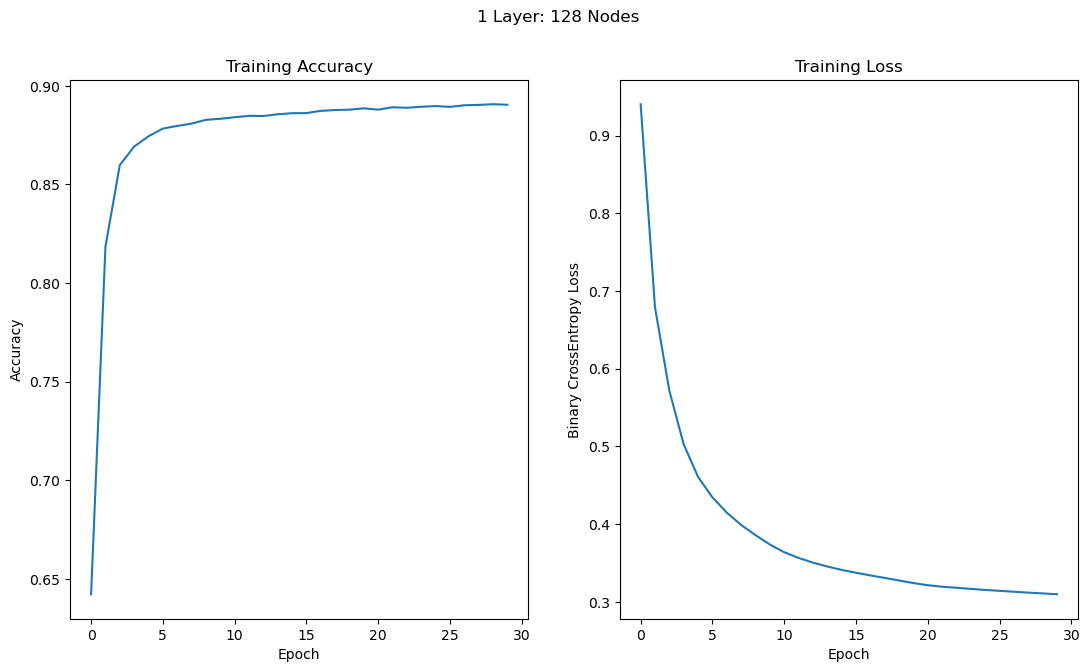

In [23]:
scoreTrain3 = model3.evaluate(feature_train_012, y_train_012_cat)
print('\nTotal Loss From Training Set: ', scoreTrain3[0])
print(f'Accuracy of Training Set: {scoreTrain3[1] * 100} %\n')

scoreValid3 = model3.evaluate(feature_valid_012, y_valid_012_cat)
print('\nTotal Loss From Validation Set: ', scoreValid3[0])
print(f'Accuracy of Validation Set: {scoreValid3[1] * 100} %\n')

accuracyCurve3 = np.array(history3.history['accuracy'])
lossCurve3 = np.array(history3.history['loss'])
plotCurve(accuracyCurve3, lossCurve3, '1 Layer: 128 Nodes')

#### Model 4: 2 Layers, 128 Nodes, 16 Nodes

##### Build The Model:

In [24]:
model4 = Sequential()
model4.add(Dense(input_dim = 4, units = 128, activation = 'tanh')) # 4 Input Dimensions: 4 quadrants
model4.add(Dense(units = 16, activation='tanh')) # 2nd Hidden Layer
model4.add(Dense(units = len(classes), activation = 'softmax')) # Output Layer
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               640       
                                                                 
 dense_7 (Dense)             (None, 16)                2064      
                                                                 
 dense_8 (Dense)             (None, 3)                 51        
                                                                 
Total params: 2,755
Trainable params: 2,755
Non-trainable params: 0
_________________________________________________________________


##### Compile And Train The Network:

Use Stochastic Gradient Descent (SGD) with Learning Rate $ \eta = 0.0001 $

In [25]:
opt4 = tf.keras.optimizers.SGD(learning_rate = 0.0001) # Stochastic Gradient Descent
model4.compile(loss='categorical_crossentropy', optimizer=opt4, metrics=['accuracy'])

history4 = model4.fit(feature_train_012, y_train_012_cat, batch_size=16, epochs=30, verbose=1)

Epoch 1/30
932/932 [==============================] - 3s 3ms/step - loss: 1.0536 - accuracy: 0.5204
Epoch 2/30
932/932 [==============================] - 3s 3ms/step - loss: 0.8694 - accuracy: 0.7366
Epoch 3/30
932/932 [==============================] - 3s 3ms/step - loss: 0.8041 - accuracy: 0.7738
Epoch 4/30
932/932 [==============================] - 2s 3ms/step - loss: 0.7521 - accuracy: 0.8010
Epoch 5/30
932/932 [==============================] - 2s 3ms/step - loss: 0.7032 - accuracy: 0.8446
Epoch 6/30
932/932 [==============================] - 2s 2ms/step - loss: 0.6535 - accuracy: 0.8605
Epoch 7/30
932/932 [==============================] - 3s 3ms/step - loss: 0.6111 - accuracy: 0.8693
Epoch 8/30
932/932 [==============================] - 4s 4ms/step - loss: 0.5786 - accuracy: 0.8747
Epoch 9/30
932/932 [==============================] - 4s 4ms/step - loss: 0.5505 - accuracy: 0.8774
Epoch 10/30
932/932 [==============================] - 4s 4ms/step - loss: 0.5255 - accuracy: 0.8790

##### Evaluate The Model:

466/466 [==============================] - 1s 3ms/step - loss: 0.3556 - accuracy: 0.8878

Total Loss From Training Set:  0.3555743992328644
Accuracy of Training Set: 88.78448009490967 %

117/117 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8762

Total Loss From Validation Set:  0.3783643841743469
Accuracy of Validation Set: 87.62083649635315 %



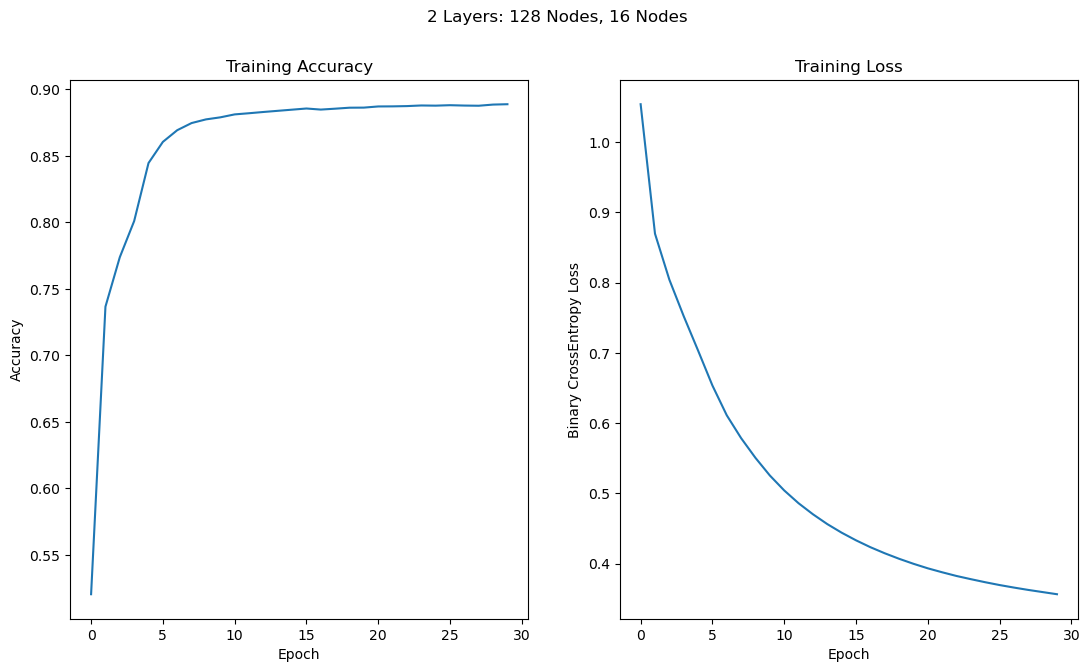

In [26]:
scoreTrain4 = model4.evaluate(feature_train_012, y_train_012_cat)
print('\nTotal Loss From Training Set: ', scoreTrain4[0])
print(f'Accuracy of Training Set: {scoreTrain4[1] * 100} %\n')

scoreValid4 = model4.evaluate(feature_valid_012, y_valid_012_cat)
print('\nTotal Loss From Validation Set: ', scoreValid4[0])
print(f'Accuracy of Validation Set: {scoreValid4[1] * 100} %\n')

accuracyCurve4 = np.array(history4.history['accuracy'])
lossCurve4 = np.array(history4.history['loss'])
plotCurve(accuracyCurve4, lossCurve4, '2 Layers: 128 Nodes, 16 Nodes')

#### Model 5: 2 Layers, 128 Nodes, 64 Nodes

##### Build The Model:

In [27]:
model5 = Sequential()
model5.add(Dense(input_dim = 4, units = 128, activation = 'tanh')) # 4 Input Dimensions: 4 quadrants
model5.add(Dense(units = 64, activation='tanh')) # 2nd Hidden Layer
model5.add(Dense(units = len(classes), activation = 'softmax')) # Output Layer
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               640       
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 3)                 195       
                                                                 
Total params: 9,091
Trainable params: 9,091
Non-trainable params: 0
_________________________________________________________________


##### Compile And Train The Network:

Use Stochastic Gradient Descent (SGD) with Learning Rate $ \eta = 0.0001 $

In [28]:
opt5 = tf.keras.optimizers.SGD(learning_rate = 0.0001) # Stochastic Gradient Descent
model5.compile(loss='categorical_crossentropy', optimizer=opt5, metrics=['accuracy'])

history5 = model5.fit(feature_train_012, y_train_012_cat, batch_size=16, epochs=30, verbose=1)

Epoch 1/30
932/932 [==============================] - 2s 2ms/step - loss: 0.7859 - accuracy: 0.7297
Epoch 2/30
932/932 [==============================] - 3s 3ms/step - loss: 0.5842 - accuracy: 0.8471
Epoch 3/30
932/932 [==============================] - 3s 3ms/step - loss: 0.5114 - accuracy: 0.8631
Epoch 4/30
932/932 [==============================] - 3s 4ms/step - loss: 0.4686 - accuracy: 0.8721
Epoch 5/30
932/932 [==============================] - 3s 3ms/step - loss: 0.4396 - accuracy: 0.8768
Epoch 6/30
932/932 [==============================] - 4s 4ms/step - loss: 0.4171 - accuracy: 0.8782
Epoch 7/30
932/932 [==============================] - 3s 4ms/step - loss: 0.3995 - accuracy: 0.8797
Epoch 8/30
932/932 [==============================] - 3s 4ms/step - loss: 0.3850 - accuracy: 0.8820
Epoch 9/30
932/932 [==============================] - 4s 4ms/step - loss: 0.3733 - accuracy: 0.8821
Epoch 10/30
932/932 [==============================] - 4s 4ms/step - loss: 0.3635 - accuracy: 0.8830

##### Evaluate The Model:

466/466 [==============================] - 1s 2ms/step - loss: 0.3031 - accuracy: 0.8922

Total Loss From Training Set:  0.3031317889690399
Accuracy of Training Set: 89.22075033187866 %

117/117 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.8781

Total Loss From Validation Set:  0.3269502520561218
Accuracy of Validation Set: 87.80880570411682 %



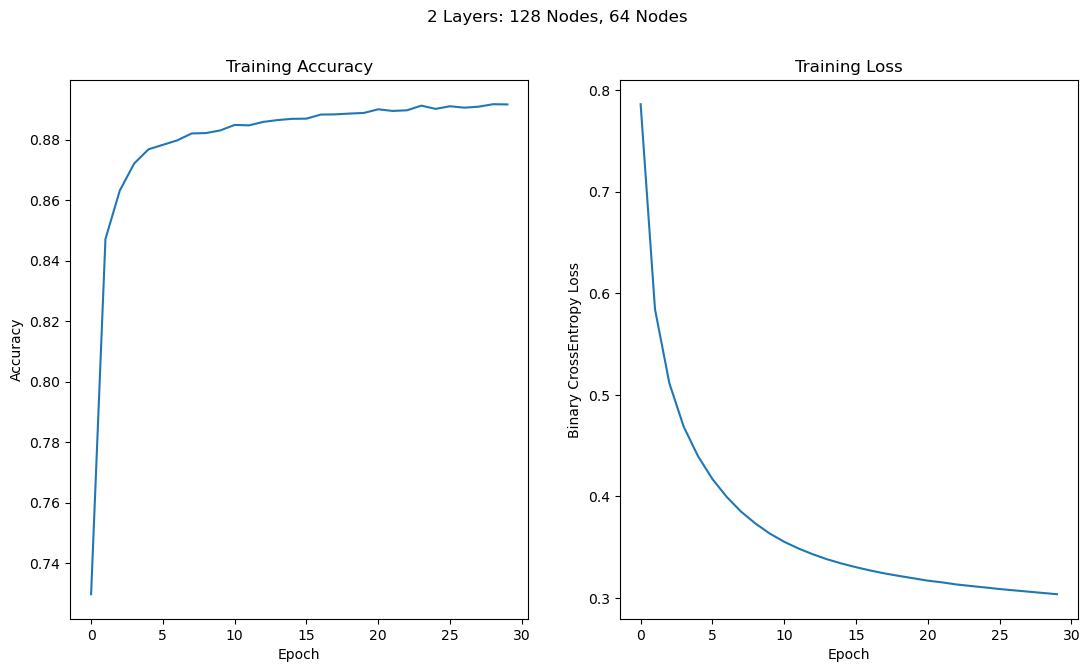

In [29]:
scoreTrain5 = model5.evaluate(feature_train_012, y_train_012_cat)
print('\nTotal Loss From Training Set: ', scoreTrain5[0])
print(f'Accuracy of Training Set: {scoreTrain5[1] * 100} %\n')

scoreValid5 = model5.evaluate(feature_valid_012, y_valid_012_cat)
print('\nTotal Loss From Validation Set: ', scoreValid5[0])
print(f'Accuracy of Validation Set: {scoreValid5[1] * 100} %\n')

accuracyCurve5 = np.array(history5.history['accuracy'])
lossCurve5 = np.array(history5.history['loss'])
plotCurve(accuracyCurve5, lossCurve5, '2 Layers: 128 Nodes, 64 Nodes')

#### Training & Validation Set Results: 
<div align="center">

| Model # | Details | Training<br>Loss | Training<br>Accuracy | Validation<br>Loss | Validation<br>Accuracy |
| :-: | :-: | :-: | :-: | :-: | :-: |
| $ 1 $ | 1 Layer<br>16 Nodes | $0.6868$ | $82.21 \ \% $ | $0.6979$ | $81.39 \ \%$ |
| $ 2 $ | 1 Layer<br>64 Nodes | $0.3362$ | $88.55 \ \%$ | $0.3567$ | $87.16 \ \%$ |
| $ 3 $ | 1 Layer<br>128 Nodes | $0.3178$ | $88.99 \ \%$ | $0.3367$ | $87.65 \ \%$ |
| $ 4 $ | 2 Layers<br>128 Nodes<br>16 nodes | $0.3085$ | $89.19 \ \%$ | $0.3240$ | $87.89 \ \%$ |
| $ 5 $ | 2 Layers<br>128 Nodes<br>64 nodes | $0.3023$ | $89.22 \ \%$ | $0.3204$ | $88.14 \ \%$ |

</div>

#### f) What behavior do you observe in the training loss and the validation loss when you increase the number of layers and nodes in the previous table. Which model is more suitable in this problem? Explain.

 - As the number of nodes increases in the first hidden layer, the Training Accuracy curve inclines sharper and steeper in the beginning, while the Training Loss curve declined sharper and steeper. There is also a smoother curve as the number of nodes increases. This indicates that the model is adapting/learning faster with more nodes than with less nodes.
 - Also notable is that although adding more nodes seems to slightly improve accuracy and slightly reduce loss, adding more layers does not necessarily improve accuracy or reduce loss over the course of many tests. 
     - In this case, from Model #3 to Model #4 we added 16 more nodes in an additional hidden layer, but Model #4 performed marginally worse in training accuracy than Model #3. The imporvements in the other 3 categories were very marginal at best. I can say that statistically, both of these models performed equally well if averaged over many different tests. 
     - From Model #3 to Model #5, we added 64 more nodes in an additional hidden layer, but the overall results in 3 categories were marginally better, with validation loss being marginally worse.
     - From Model #4 to Model #5, we increased the 2nd layer node amount from 16 to 64 nodes, but the Validation accuracy performed marginally worse, and the other 3 categories were only marginally better.
 - For this classification problem, Model #3 seems to provide the best combination of accuracy, lowest loss, and is also less resource heavy as either 2 layer model #4 or model #5, which in my opinion makes it the best choice here.
     - Model #3 has the desired combination of good accuracy, low loss and consumes the least amount of resources to perform as well or better than both 2 layer models #4 and #5.

#### Evaluate the selected model in part (e) on the testing set and report the testing loss and accuracy.

 - Model 6: Select Model #3: 1 Layer, 128 Nodes to evaluate on Testing Data.

##### Evaluate The Model:

In [41]:
scoreTestT = model3.evaluate(feature_test_012, y_test_012_cat)
print('\nTotal Loss From Testing Set: ', scoreTestT[0])
print(f'Accuracy of Testing Set: {scoreTestT[1] * 100} %\n')

99/99 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8793

Total Loss From Testing Set:  0.3324456512928009
Accuracy of Testing Set: 87.92501091957092 %



#### Testing Set Results: 
<div align="center">

| Model # | Details | Testing<br>Loss | Testing<br>Accuracy |
| :-: | :-: | :-: | :-: |
| $ 3 $ | 1 Layer<br>128 Nodes | $0.3382$ | $87.86 \ \%$ |

</div>

## Problem 3) Keras Application: Build, Compile, and Train a Neural Network to Classify Songs from a Spotify dataset.

 - `Target` Column Denotes if the song made the weekly 'Billboard Hot-100' 

#### Functions For Problem #3:

In [31]:
def plotDisplayMetrics(model, model_history, plotTitle):
    accuracy = np.array(model_history.history['accuracy'])
    loss = np.array(model_history.history['loss'])
    plotCurve(accuracy, loss, plotTitle)

    train_score = [accuracy[-1], loss[-1]]
    print(f'\nTraining Accuracy: {round(train_score[0], 5) * 100} %')
    print(f'Training Loss: {round(train_score[1], 4)}')

# Split Features and Labels from the Training DataFrame
def featuresLabelsSplit(data, labelColumnName):
    features = data.copy()
    columnTitles = list(data.columns)
    features = features.reindex(columns = columnTitles)
    labels = features.pop(labelColumnName)
    featureNames = list(features.columns)
    features = np.array(features)
    labels = np.array(labels)
    labels = labels.reshape((features.shape[0], 1))
    return features, labels, featureNames

# Split Features & Labels from Testing DataFrame
def featuresLabelsSplitTest(data, labelColumnName, featureNames):
    features = data.copy()
    columnTitles = list(data.columns)
    features = features.reindex(columns = columnTitles)
    labels = features.pop(labelColumnName)
    featuresSubset = np.zeros((labels.shape[0], 0))
    for column_i in featureNames:
        feature_i = np.expand_dims(features.pop(column_i), axis = 1)
        featuresSubset = np.append(featuresSubset, feature_i, axis = 1)
    labels = np.array(labels)
    labels = labels.reshape(features.shape[0], 1)
    return featuresSubset, labels

#### Import Training & Testing Data:

 - Data Is Already Scaled To Range $ [0, 1] $.
 - 1st Column Is Not An Index: `index_col=None`

In [32]:
spotify_data = pd.read_csv('../assets/HW5/spotify_preprocessed.csv', header=0, index_col=None)

print(f'Spotify Data:\n\nShape: {spotify_data.shape}')
display(spotify_data.head(10))

Spotify Data:

Shape: (6398, 16)


danceability    energy       key  loudness  mode  speechiness  \
0      0.738790  0.626533  0.090909  0.899432   0.0     0.070809   
1      0.418807  0.247058  0.454545  0.687954   0.0     0.012962   
2      0.530910  0.415269  0.818182  0.862211   0.0     0.031601   
3      0.478668  0.648560  0.000000  0.880682   0.0     0.032351   
4      0.810623  0.887860  0.090909  0.919516   1.0     0.270487   
5      0.456900  0.873842  0.000000  0.935578   1.0     0.067274   
6      0.512407  0.935920  0.000000  0.923558   1.0     0.113016   
7      0.733348  0.522403  0.181818  0.830753   1.0     0.100161   
8      0.112973  0.985982  0.636364  0.941147   1.0     0.158007   
9      0.353505  0.773717  0.727273  0.880962   1.0     0.158007   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  \
0      0.020080          0.000000  0.068476  0.723361  0.400098     0.093080   
1      0.874498          0.818090  0.080700  0.256148  0.676658     0.086266   
2      0.161647          0.000000  0.094582  0.280738  0.773251     0.103036   
3      0.005151          0.000000  0.194033  0.298156  0.305743     0.095749   
4      0.003825          0.000000  0.387755  0.799180  0.705958     0.067117   
5      0.011145          0.000000  0.406402  0.755123  0.732571     0.108233   
6      0.013956          0.000000  0.156739  0.492828  0.586937     0.136498   
7      0.030020          0.000000  0.094582  0.378074  0.339017     0.100058   
8      0.001837          0.014271  0.975137  0.142418  0.788751     0.130803   
9      0.098394          0.000000  0.199213  0.377049  0.228777     0.131585   

   time_signature  chorus_hit  sections  target  
0             0.8    0.193225  0.093023     1.0  
1             0.6    0.155665  0.081395     0.0  
2             0.8    0.210605  0.081395     1.0  
3             0.8    0.138515  0.058140     0.0  
4             0.8    0.117248  0.069767     1.0  
5             0.8    0.150937  0.116279     1.0  
6             0.8    0.098731  0.139535     0.0  
7             0.8    0.282472  0.093023     1.0  
8             0.8    0.146540  0.104651     0.0  
9             0.8    0.109322  0.081395     1.0

In [33]:
data, labels, features = featuresLabelsSplit(spotify_data, 'target')
classesSpotify = [0, 1]

print(f'Data From Data Frame: \n{data}')
print(f'\nLabels From Data Frame: \n{labels}')
print(f'\nFeature Names: \n{features}')

print(f'\n\nShape of \'data\': {data.shape}')
print(f'\nShape of \'labels\': {labels.shape}')
print(f'\nTotal features: {len(features)}')

Data From Data Frame: 
[[0.73878973 0.62653279 0.09090909 ... 0.8        0.1932247  0.09302326]
 [0.41880714 0.24705807 0.45454545 ... 0.6        0.15566527 0.08139535]
 [0.53090988 0.4152685  0.81818182 ... 0.8        0.21060483 0.08139535]
 ...
 [0.71484545 0.80475575 0.90909091 ... 0.8        0.09727058 0.05813953]
 [0.58532869 0.17697039 0.63636364 ... 0.8        0.10158341 0.13953488]
 [0.06399652 0.12290275 0.36363636 ... 0.8        0.33334162 0.15116279]]

Labels From Data Frame: 
[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [0.]]

Feature Names: 
['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections']


Shape of 'data': (6398, 15)

Shape of 'labels': (6398, 1)

Total features: 15


#### Shuffle Data & Split Data:

 - $ 10 \% $ of the original data for Testing.
 - $ 90 \% $ of the original data for Training.
 - Split the Training Data into $ 80 \% $ Training and $ 20 \% $ Validation.

In [34]:
totalIndices = data.shape[0]

# New Array For Randomizing the Training and Validation Sets
spotifyIndices = np.arange(0, totalIndices)
print(f'Ordered Spotify Indices: {spotifyIndices}')
spotifyIndicesRnd = np.random.permutation(spotifyIndices)
print(f'Randomized Training Indices: {spotifyIndicesRnd}\n')

# Extract 10% of Total Spotify Data as Test Data & Randomize
spot_test_rnd = data[spotifyIndicesRnd[0:int(0.1 * totalIndices)],:]
#print(f'Random Test Data: {spot_test_rnd}\n')
spot_test_labels = labels[spotifyIndicesRnd[0:int(0.1 * totalIndices)]]
#print(f'Test Data Labels: {spot_test_labels}\n')

# Randomize the remaining 90% of the data for Training
spot_train_rnd_total = data[spotifyIndicesRnd[int(0.1 * totalIndices):],:]
spot_train_labels_total = labels[spotifyIndicesRnd[int(0.1 * totalIndices):]]
print(f'Total Data Before Test & Train = {data.shape[0]}')
print(f'Total Testing Data = {spot_test_rnd.shape[0]}')
print(f'Total Training Data = {spot_train_rnd_total.shape[0]}\n')

if (data.shape[0] == spot_test_rnd.shape[0] + spot_train_rnd_total.shape[0]):
    print('SUCCESS!!\n')
else:
    print('FAIL\n')

totalTraining = spot_train_rnd_total.shape[0]

# New Array For Randomizing the Training and Validation Set
trainIndices = np.arange(0, totalTraining)
print(f'Ordered Test Indices: {trainIndices}')
trainIndicesRnd = np.random.permutation(trainIndices)
print(f'Randomized Test Indices: {trainIndicesRnd}\n')

spot_train_rnd = spot_train_rnd_total[trainIndicesRnd[0:int(0.8 * totalTraining)],:]
#print(spot_train_rnd)
spot_train_labels = spot_train_labels_total[trainIndicesRnd[0:int(0.8 * totalTraining)]]
#print(spot_train_labels, '\n')

spot_valid_rnd = spot_train_rnd_total[trainIndicesRnd[int(0.8 * totalTraining):],:]
#print(spot_valid_rnd)
spot_valid_labels = spot_train_labels_total[trainIndicesRnd[int(0.8 * totalTraining):]]
#print(spot_train_labels, '\n')

# Test that the original training set = new training set + validation set:
if(totalTraining == spot_train_rnd.shape[0] + spot_valid_rnd.shape[0]):
    print('SUCCESS!!\n')
else:
    print('FAIL!!\n')

print(f'Total Data = {data.shape[0]}')
print(f'Total Testing Data = {spot_test_rnd.shape[0]}')
print(f'Total Testing Labels = {spot_test_labels.shape[0]}')
print(f'Total Training Data = {spot_train_rnd.shape[0]}')
print(f'Total Training Labels = {spot_train_labels.shape[0]}')
print(f'Total Validation Data = {spot_valid_rnd.shape[0]}')
print(f'Total Validation Lables = {spot_valid_labels.shape[0]}')
print(f'Test + Training + Validation = {spot_valid_rnd.shape[0] + spot_train_rnd.shape[0] + spot_test_rnd.shape[0]}')

Ordered Spotify Indices: [   0    1    2 ... 6395 6396 6397]
Randomized Training Indices: [2647  438 1529 ... 5679  304 2808]

Total Data Before Test & Train = 6398
Total Testing Data = 639
Total Training Data = 5759

SUCCESS!!

Ordered Test Indices: [   0    1    2 ... 5756 5757 5758]
Randomized Test Indices: [ 789 2420 2376 ... 5732 2881 3852]

SUCCESS!!

Total Data = 6398
Total Testing Data = 639
Total Testing Labels = 639
Total Training Data = 4607
Total Training Labels = 4607
Total Validation Data = 1152
Total Validation Lables = 1152
Test + Training + Validation = 6398


#### Convert Label Vectors To Binary Class Matrices:

In [35]:
spot_test_labels = to_categorical(spot_test_labels, len(classesSpotify))
spot_train_labels = to_categorical(spot_train_labels, len(classesSpotify))
spot_valid_labels = to_categorical(spot_valid_labels, len(classesSpotify))

#### Build, Compile, and Train the Network:

In [36]:
model7 = Sequential()
model7.add(Dense(input_dim = 15, units = 128, activation = 'tanh')) # 4 Input Dimensions: 4 quadrants
model7.add(Dense(units = 128, activation='tanh')) # 2nd Hidden Layer
model7.add(Dense(units = len(classesSpotify), activation = 'sigmoid')) # Output Layer
model7.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               2048      
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 2)                 258       
                                                                 
Total params: 18,818
Trainable params: 18,818
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
4607/4607 [==============================] - 14s 3ms/step - loss: 0.6397 - accuracy: 0.7000
Epoch 2/50
4607/4607 [==============================] - 15s 3ms/step - loss: 0.5637 - accuracy: 0.7456
Epoch 3/50
4607/4607 [==============================] - 17s 4ms/step - loss: 0.5191 - accuracy: 0.7630
Epoch 4/50
4607/4607 [==============================] - 22s 5ms/step - loss: 0.4979 - accuracy: 0.7686
Epoch 5/50
4607/4607 [==============================] - 21s 5ms/step - loss: 0.4860 - accuracy: 0.7751
Epoch 6/50
4607/4607 [==============================] - 19s 4ms/step - loss: 0.4793 - accuracy: 0.7773
Epoch 7/50
4607/4607 [==============================] - 22s 5ms/step - loss: 0.4738 - accuracy: 0.7779
Epoch 8/50
4607/4607 [==============================] - 21s 4ms/step - loss: 0.4711 - accuracy: 0.7769
Epoch 9/50
4607/4607 [==============================] - 20s 4ms/step - loss: 0.4688 - accuracy: 0.7749
Epoch 10/50
4607/4607 [==============================] - 22s 5ms/step - l

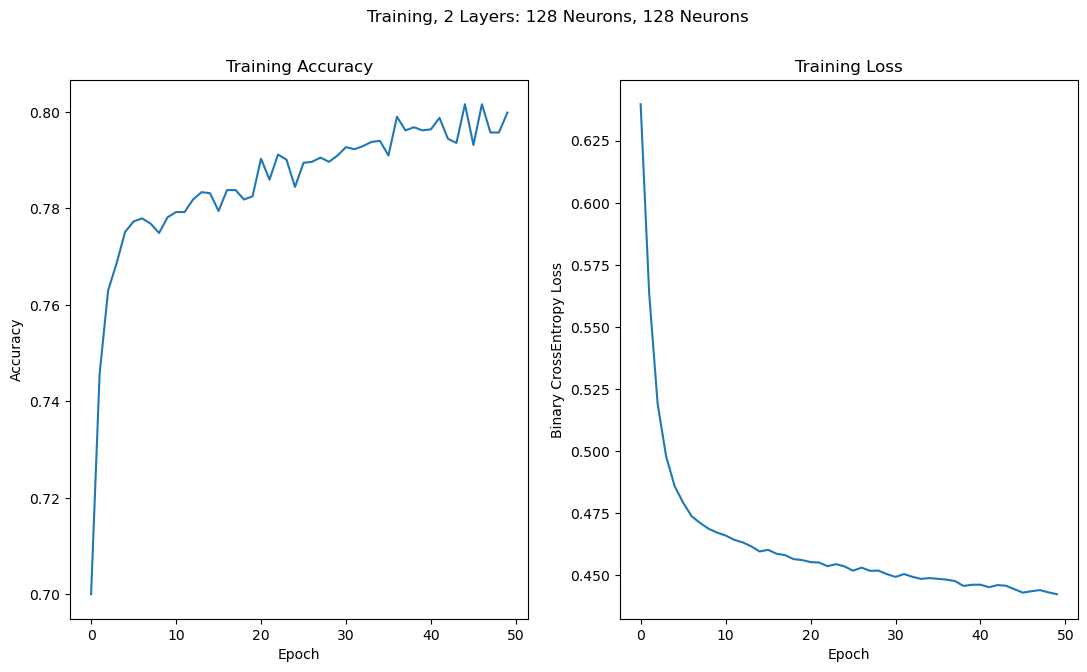


Training Accuracy: 79.987 %
Training Loss: 0.4424


In [37]:
opt7 = tf.keras.optimizers.SGD(learning_rate = 0.001) # Stochastic Gradient Descent
model7.compile(loss='binary_crossentropy', optimizer=opt7, metrics=['accuracy'])

history7 = model7.fit(spot_train_rnd, spot_train_labels, batch_size=1, epochs=50, verbose=1)

plotDisplayMetrics(model7, history7, 'Training, 2 Layers: 128 Neurons, 128 Neurons')

#### Evaluate The Testing & Validation Sets:

In [38]:
testScore = model7.evaluate(spot_test_rnd, spot_test_labels)
validScore = model7.evaluate(spot_valid_rnd, spot_valid_labels)

print(f'\nTest Set Accuracy: {round(testScore[1], 5) * 100} %')
print(f'Testing Loss: {round(testScore[0], 4)}\n')
print(f'\nValidation Set Accuracy: {round(validScore[1], 5) * 100} %')
print(f'Testing Loss: {round(validScore[0], 4)}')

36/36 [==============================] - 0s 3ms/step - loss: 0.4449 - accuracy: 0.7917

Test Set Accuracy: 80.125 %
Testing Loss: 0.4265


Validation Set Accuracy: 79.167 %
Testing Loss: 0.4449
